# Корреляция и корреляционный анализ


### Задание 1
* коэффициент корреляции Пирсона = -0.654849
* коэффициент корреляции Спирмена = -0.631665
* модель линейной регрессии: mortality = 1668.97 - 3.13 * hardness
* коэффициент детерминации = 0.50465

По данным точечной диаграммы прослеживается *обратная линейная зависимость* между смертностью и содержанием кальция в питьевой воде.
Значения коэффициентов корреляции Пирсона и Спирмена говорят о средней силы обратной линейной взаимосвязи этих показателей.
Построенная модель линейной регрессии на 50% объясняет отклонение уровня смертности от его средней величины по выбранным данным. Качество модели - среднее.
Остатки случайны.

In [126]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [127]:
def residuals_calculate(row):
    return row['y_test'] - row['y_pred']

In [128]:
mortality_df = pd.read_csv('water.csv')
mortality_df.info()
mortality_df.set_index('Unnamed: 0', drop = True, inplace = True)
mortality_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


,location,town,mortality,hardness
Unnamed: 0,,,,
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

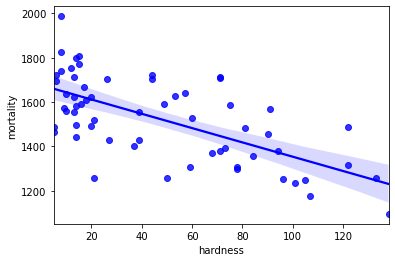

In [129]:
sns.regplot(data = mortality_df, x = 'hardness', y = 'mortality', color = 'blue')

In [130]:
mortality_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [131]:
mortality_df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [132]:
X = mortality_df[['hardness']]
y = mortality_df['mortality']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [134]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
model.coef_

array([-3.13167087])

In [136]:
model.intercept_

1668.9722977277095

In [137]:
model.score(X_test, y_test)

0.5046490611017092

In [138]:
y_pred = model.predict(X_test)

In [139]:
residuals_df = X_test.copy()
residuals_df['y_pred'] = y_pred
residuals_df['y_test'] = y_test
residuals_df['residuals'] = residuals_df.apply(residuals_calculate, axis = 1)
residuals_df

,hardness,y_pred,y_test,residuals
Unnamed: 0,,,,
1,105,1340.146856,1247,-93.146856
6,10,1637.655589,1558,-79.655589
47,14,1625.128906,1495,-130.128906
32,44,1531.178779,1702,170.821221
14,78,1424.701970,1307,-117.701970
56,20,1606.338880,1625,18.661120
35,133,1252.460072,1259,6.539928
50,75,1434.096982,1587,152.903018
13,21,1603.207209,1519,-84.207209


<AxesSubplot:xlabel='hardness', ylabel='residuals'>

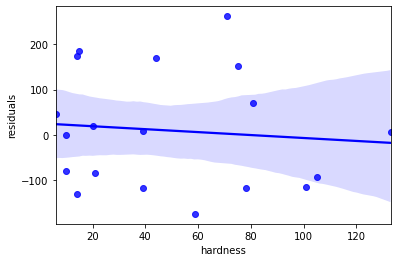

In [140]:
sns.regplot(data = residuals_df, x = 'hardness', y = 'residuals', color = 'blue')

### Задание 2
#### Север:
* коэффициент корреляции Пирсона = -0.368598
* коэффициент корреляции Спирмена = -0.404208
* модель линейной регрессии: mortality_north = 1709.79 - 2.06 * hardness_north
* коэффициент детерминации = -0.0764

По данным точечной диаграммы прослеживается скорее *гиперболическая зависимость* между смертностью и содержанием кальция в питьевой воде.
Значения коэффициентов корреляции Пирсона и Спирмена говорят о средней силы обратной линейной взаимосвязи этих показателей.
Построенная модель линейной регрессии на 0% объясняет отклонение уровня смертности от его средней величины по выбранным данным. Коэффициент детерминации отрицательный, что говорит о том, что остатки по построенной модели больше, чем по среднему значению. Качество модели - низкое, возможно, требуется другой тип модели (отличный от линейного). Паттерна в остатках нет, но они слишком велики.

#### Юг:
* коэффициент корреляции Пирсона = -0.602153
* коэффициент корреляции Спирмена = -0.595723
* модель линейной регрессии: mortality_south = 1505.97 - 1.61 * hardness_south
* коэффициент детерминации = 0.32058

По данным точечной диаграммы прослеживается *обратная линейная зависимость* между смертностью и содержанием кальция в питьевой воде.
Значения коэффициентов корреляции Пирсона и Спирмена говорят о средней силы обратной линейной взаимосвязи этих показателей.
Построенная модель линейной регрессии на 32% объясняет отклонение уровня смертности от его средней величины по выбранным данным. Качество модели - низкое. Остатки случайны.


In [141]:
mortality_df = pd.read_csv('water.csv')
mortality_df.info()
mortality_df.set_index('Unnamed: 0', drop = True, inplace = True)
mortality_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


,location,town,mortality,hardness
Unnamed: 0,,,,
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [142]:
south_mortality_df = mortality_df[(mortality_df['location'] == 'South')]
north_mortality_df = mortality_df[(mortality_df['location'] == 'North')]

In [143]:
south_mortality_df.head()

,location,town,mortality,hardness
Unnamed: 0,,,,
1,South,Bath,1247,105
3,South,Birmingham,1466,5
8,South,Bournemouth,1299,78
10,South,Brighton,1359,84
11,South,Bristol,1392,73


In [144]:
north_mortality_df.head()

,location,town,mortality,hardness
Unnamed: 0,,,,
2,North,Birkenhead,1668,17
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10
7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

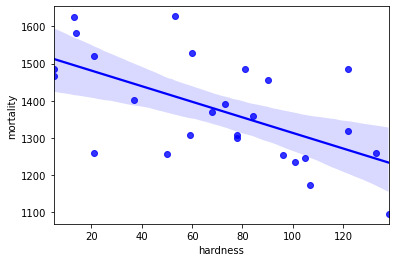

In [145]:
sns.regplot(data = south_mortality_df, x = 'hardness', y = 'mortality', color = 'blue')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

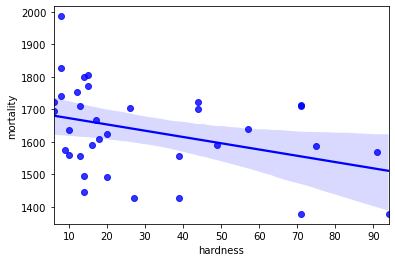

In [146]:
sns.regplot(data = north_mortality_df, x = 'hardness', y = 'mortality', color = 'blue')

In [147]:
north_mortality_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [148]:
north_mortality_df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [149]:
south_mortality_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [150]:
south_mortality_df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [151]:
X = north_mortality_df[['hardness']]
y = north_mortality_df['mortality']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 52)

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [154]:
model.coef_

array([-2.05808312])

In [155]:
model.intercept_

1709.7865804046833

In [156]:
model.score(X_test, y_test)

-0.07639281387410013

In [157]:
y_pred = model.predict(X_test)

In [158]:
residuals_df = X_test.copy()
residuals_df['y_pred'] = y_pred
residuals_df['y_test'] = y_test
residuals_df['residuals'] = residuals_df.apply(residuals_calculate, axis = 1)
residuals_df

,hardness,y_pred,y_test,residuals
Unnamed: 0,,,,
32,44,1619.230923,1702,82.769077
23,8,1693.321915,1742,48.678085
25,91,1522.501016,1569,46.498984
31,26,1656.276419,1704,47.723581
36,27,1654.218336,1427,-227.218336
5,18,1672.741084,1609,-63.741084
17,39,1629.521339,1555,-74.521339
27,16,1676.857250,1591,-85.857250
7,15,1678.915334,1807,128.084666


<AxesSubplot:xlabel='hardness', ylabel='residuals'>

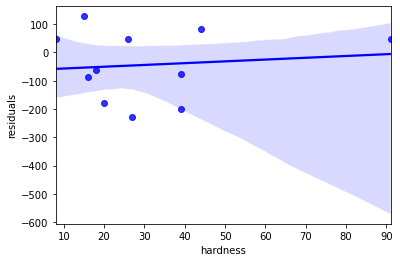

In [159]:
sns.regplot(data = residuals_df, x = 'hardness', y = 'residuals', color = 'blue')

In [160]:
X = south_mortality_df[['hardness']]
y = south_mortality_df['mortality']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 62)

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [163]:
model.coef_

array([-1.61292517])

In [164]:
model.intercept_

1505.9673469387756

In [165]:
model.score(X_test, y_test)

0.32057999237484003

In [166]:
y_pred = model.predict(X_test)

In [167]:
residuals_df = X_test.copy()
residuals_df['y_pred'] = y_pred
residuals_df['y_test'] = y_test
residuals_df['residuals'] = residuals_df.apply(residuals_calculate, axis = 1)
residuals_df

,hardness,y_pred,y_test,residuals
Unnamed: 0,,,,
35,133,1291.448299,1259,-32.448299
14,78,1380.159184,1307,-73.159184
60,81,1375.320408,1485,109.679592
33,14,1483.386395,1581,97.613605
15,96,1351.126531,1254,-97.126531
26,138,1283.383673,1096,-187.383673
49,50,1425.321088,1257,-168.321088
8,78,1380.159184,1299,-81.159184


<AxesSubplot:xlabel='hardness', ylabel='residuals'>

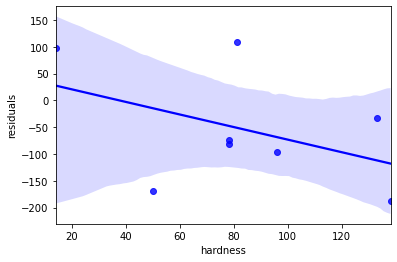

In [168]:
sns.regplot(data = residuals_df, x = 'hardness', y = 'residuals', color = 'blue')